* https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d
* https://github.com/anurag-code/Survival-Analysis-Intuition-Implementation-in-Python/blob/master/Survival%20Analysis%20-%20Quick%20Implementation.ipynb
* https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e
* https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html
* https://medium.com/analytics-vidhya/concordance-index-72298c11eac7#:~:text=The%20concordance%20index%20or%20c,number%20of%20possible%20evaluation%20pairs.
* https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html
* https://github.com/alonsosilvaallende/Concordance_Index/blob/master/Concordance_index_colab.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
from lifelines.utils import concordance_index
%pylab inline
figsize(12,12)

Populating the interactive namespace from numpy and matplotlib


In [3]:
kmf = KaplanMeierFitter()

In [4]:
data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [5]:
data.columns

Index(['ctryname', 'cowcode2', 'politycode', 'un_region_name',
       'un_continent_name', 'ehead', 'leaderspellreg', 'democracy', 'regime',
       'start_year', 'duration', 'observed'],
      dtype='object')

In [6]:
T = data["duration"]
E = data["observed"]
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

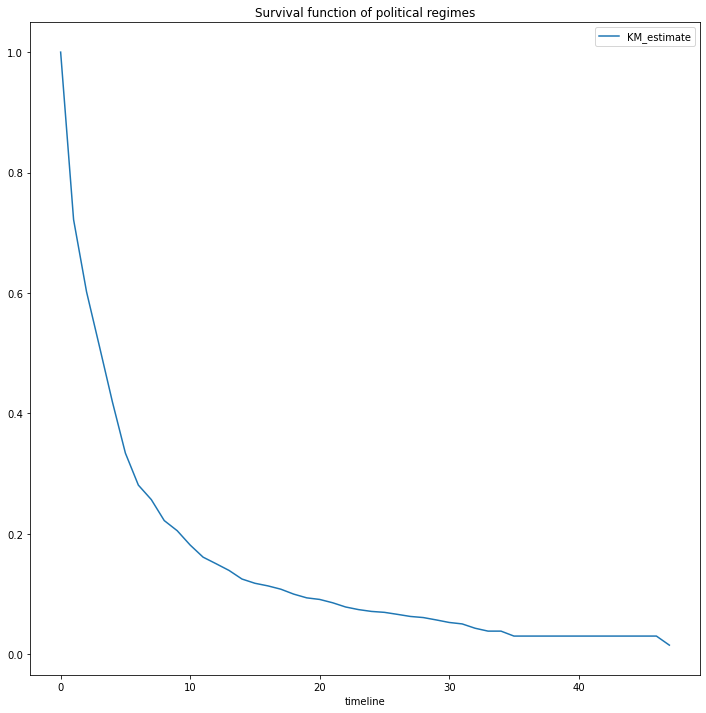

In [7]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

<AxesSubplot:xlabel='timeline'>

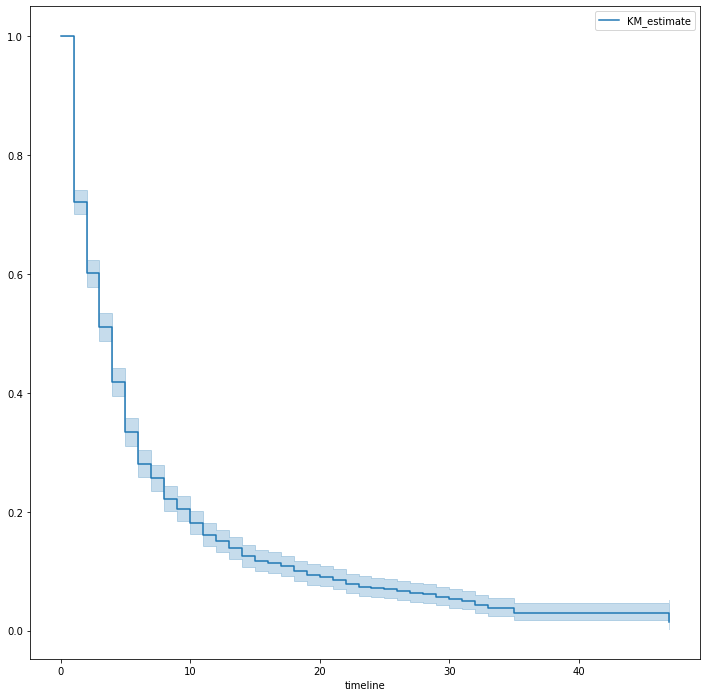

In [8]:
kmf.plot_survival_function()

In [13]:
dem = (data["democracy"] == "Democracy")
T[dem]

12       1
13       5
14       1
15       1
16       3
        ..
1766     5
1767     4
1768     1
1769     5
1770    10
Name: duration, Length: 1187, dtype: int64

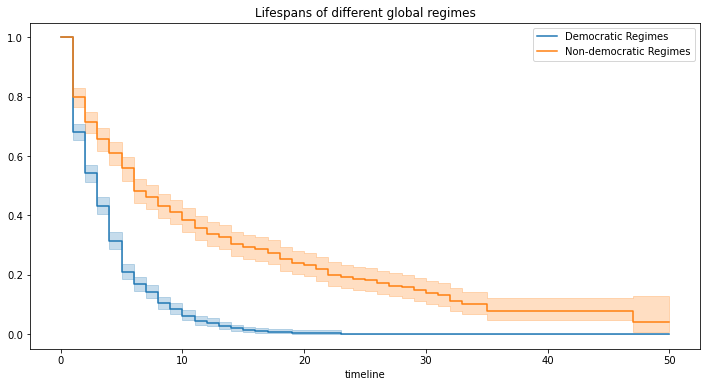

In [30]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
t = np.linspace(0, 50, 51)
kmf.fit(T[dem], event_observed=E[dem], timeline=t, label="Democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], timeline=t, label="Non-democratic Regimes")
ax = kmf.plot_survival_function(ax=ax)

plt.title("Lifespans of different global regimes");

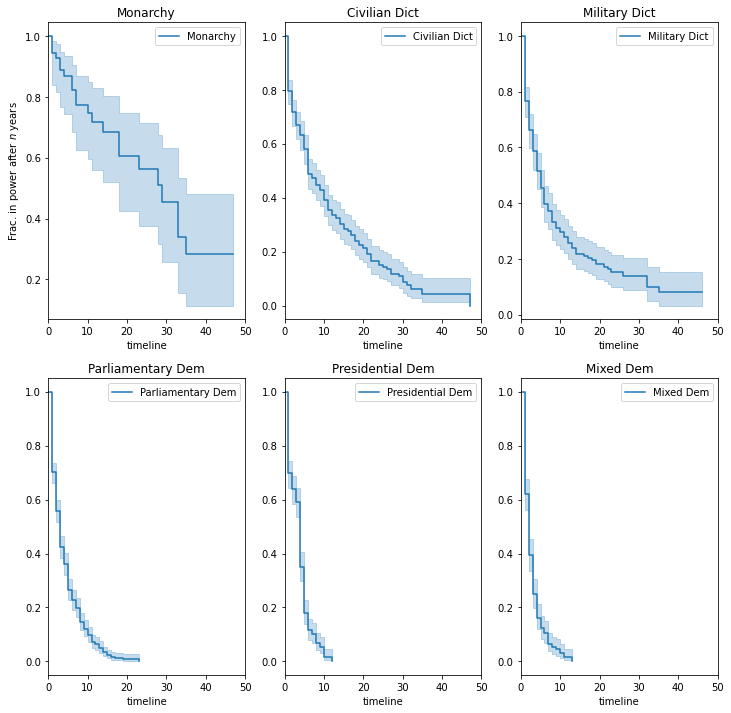

<Figure size 576x432 with 0 Axes>

In [83]:
regime_types = data['regime'].unique()

for i, regime_type in enumerate(regime_types):
    ax = plt.subplot(2, 3, i + 1)

    ix = data['regime'] == regime_type
    kmf.fit(T[ix], E[ix], label=regime_type)
    ax = kmf.plot_survival_function(ax=ax)
    
    

    plt.title(regime_type)
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')


plt.figure(figsize=(8,6))
plt.tight_layout()


4.833333333333333
Concordance index: 0.4384364952581239
Concordance index: 0.3600165524851717
5.8
Concordance index: 0.40447604850731234
Concordance index: 0.26478174603174603
9.666666666666666
Concordance index: 0.48294436377802175
Concordance index: 0.4410150891632373
7.25
Concordance index: 0.4824369845510512
Concordance index: 0.4425531914893617
14.5
Concordance index: 0.48525084332161056
Concordance index: 0.4471450617283951
1.2
Concordance index: 0.40447604850731234
Concordance index: 0.26478174603174603
2.0
Concordance index: 0.48294436377802175
Concordance index: 0.4410150891632373
1.5
Concordance index: 0.4824369845510512
Concordance index: 0.4425531914893617
3.0
Concordance index: 0.48525084332161056
Concordance index: 0.4471450617283951
1.6666666666666667
Concordance index: 0.48294436377802175
Concordance index: 0.4410150891632373
1.25
Concordance index: 0.4824369845510512
Concordance index: 0.4425531914893617
2.5
Concordance index: 0.48525084332161056
Concordance index: 0.4

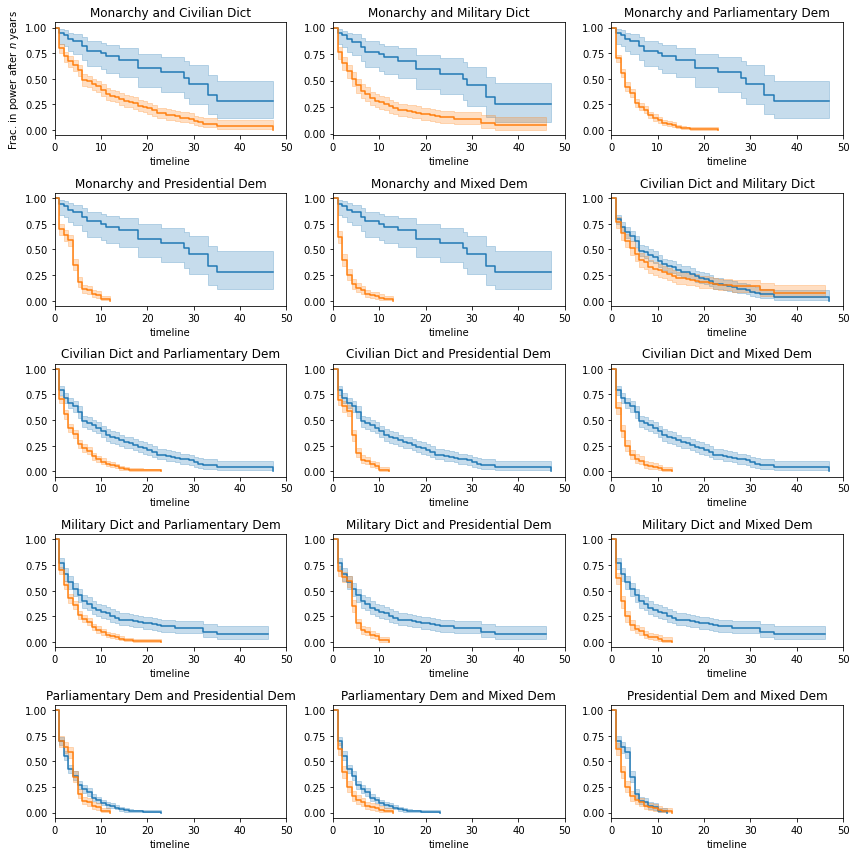

In [100]:
com = list(combinations(regime_types, 2))
for i, item in enumerate(com):
    #print (i, item[0], item[1])
    ax = plt.subplot(5, 3, i + 1)

    ix = data['regime'] == item[0]
    kmf.fit(T[ix], E[ix], label=item[0])
    ax = kmf.plot_survival_function(ax=ax, legend=False)
    srv_time1 = kmf.median_survival_time_
    ix = data['regime'] == item[1]
    kmf.fit(T[ix], E[ix], label=item[1])
    ax = kmf.plot_survival_function(ax=ax, legend=False)
    srv_time2 = kmf.median_survival_time_
    print(float(srv_time1/srv_time2))
    print(f'Concordance index: {concordance_index(T[ix], E[ix])}')
    print(f'Concordance index: {concordance_index(E[ix], T[ix])}')
    
    plt.title(str(item[0])+' and '+str(item[1]))
    plt.xlim(0, 50)

    if i==0:
        plt.ylabel('Frac. in power after $n$ years')

plt.tight_layout()

## CoxPH model

In [10]:
from lifelines import CoxPHFitter 

In [17]:
data_r= data.loc[:,['politycode','duration', 'observed']]
data_r = data_r.dropna(how='any',axis=0) 

In [18]:
data_r

,politycode,duration,observed
0,700.0,7,1
1,700.0,10,1
2,700.0,10,1
3,700.0,5,0
4,700.0,1,0
...,...,...,...
1803,551.0,6,1
1804,551.0,1,0
1805,552.0,14,1
1806,552.0,1,1


In [19]:
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(data_r, 'duration', event_col='observed')   ## Fit the data to train the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1801 total observations, 339 right-censored observations>
             duration col = 'duration'
                event col = 'observed'
      baseline estimation = breslow
   number of observations = 1801
number of events observed = 1462
   partial log-likelihood = -9684.31
         time fit was run = 2022-05-01 04:39:29 UTC

---
             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                          
politycode  -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

               z      p   -log2(p)
covariate                         
politycode -5.78 <0.005      27.03
---
Concordance = 0.53
Partial AIC = 19370.61
log-likelihood ratio test = 34.00 on 1 df
-log2(p) of ll-ratio test = 27.43

<AxesSubplot:xlabel='log(HR) (95% CI)'>

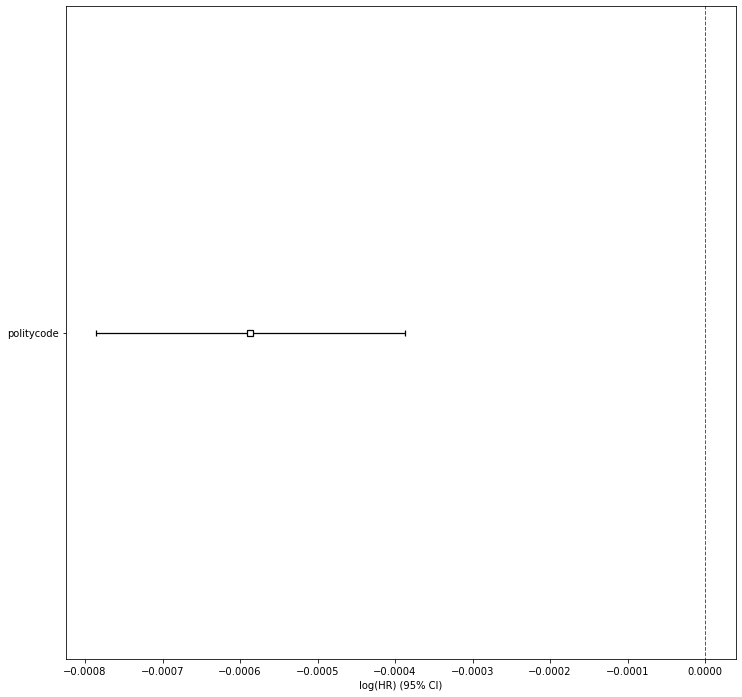

In [20]:
cph.plot()

In [62]:
type(com[0])

tuple